In [1]:
#autoreload so we can change the data without restarting kernel
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import numpy as np
from collections import OrderedDict
from PredictionData.Predictions2025 import *
from Scripts.PlottingScripts import plot_matches, plot_ranking, plot_significance, plot_tournament_ranking, get_fig_crops
from Scripts.AnalysisScripts import calc_trysq, calc_trysq_weekly, calc_trysq_avg, calculate_average_prediction

from copy import deepcopy

# Tournament Tracking

In [2]:
# Collect up all of the game info for each week so we can do week-by-week and full tournament analysis
# Shape is: game_info["WeekX"] = [list_of_games_as_string_tuple,predictions_dict,final_score_dict] 
game_info = {}

# Week 1

In [3]:
#Reload the prediction so we don't have to restart the kernel every time the data changes...
from PredictionData.Predictions2025 import predictions_wk1
week_number=1

calculate_average_prediction(predictions_wk1)
games = [("France","Wales"),("Scotland","Italy"),("Ireland","England")]

FinalScore = {
    ("France","Wales"):(43,0),
    ("Scotland","Italy"):(31,19),
    ("Ireland","England"):(27,22),
}
game_info["Week1"] = [games,predictions_wk1,FinalScore]
game_info["All"] = [deepcopy(games),deepcopy(predictions_wk1),deepcopy(FinalScore)]


In [4]:
predictions = predictions_wk1 #Pick the predictions
markers = player_markers #Pick the markers to use

### Score plot

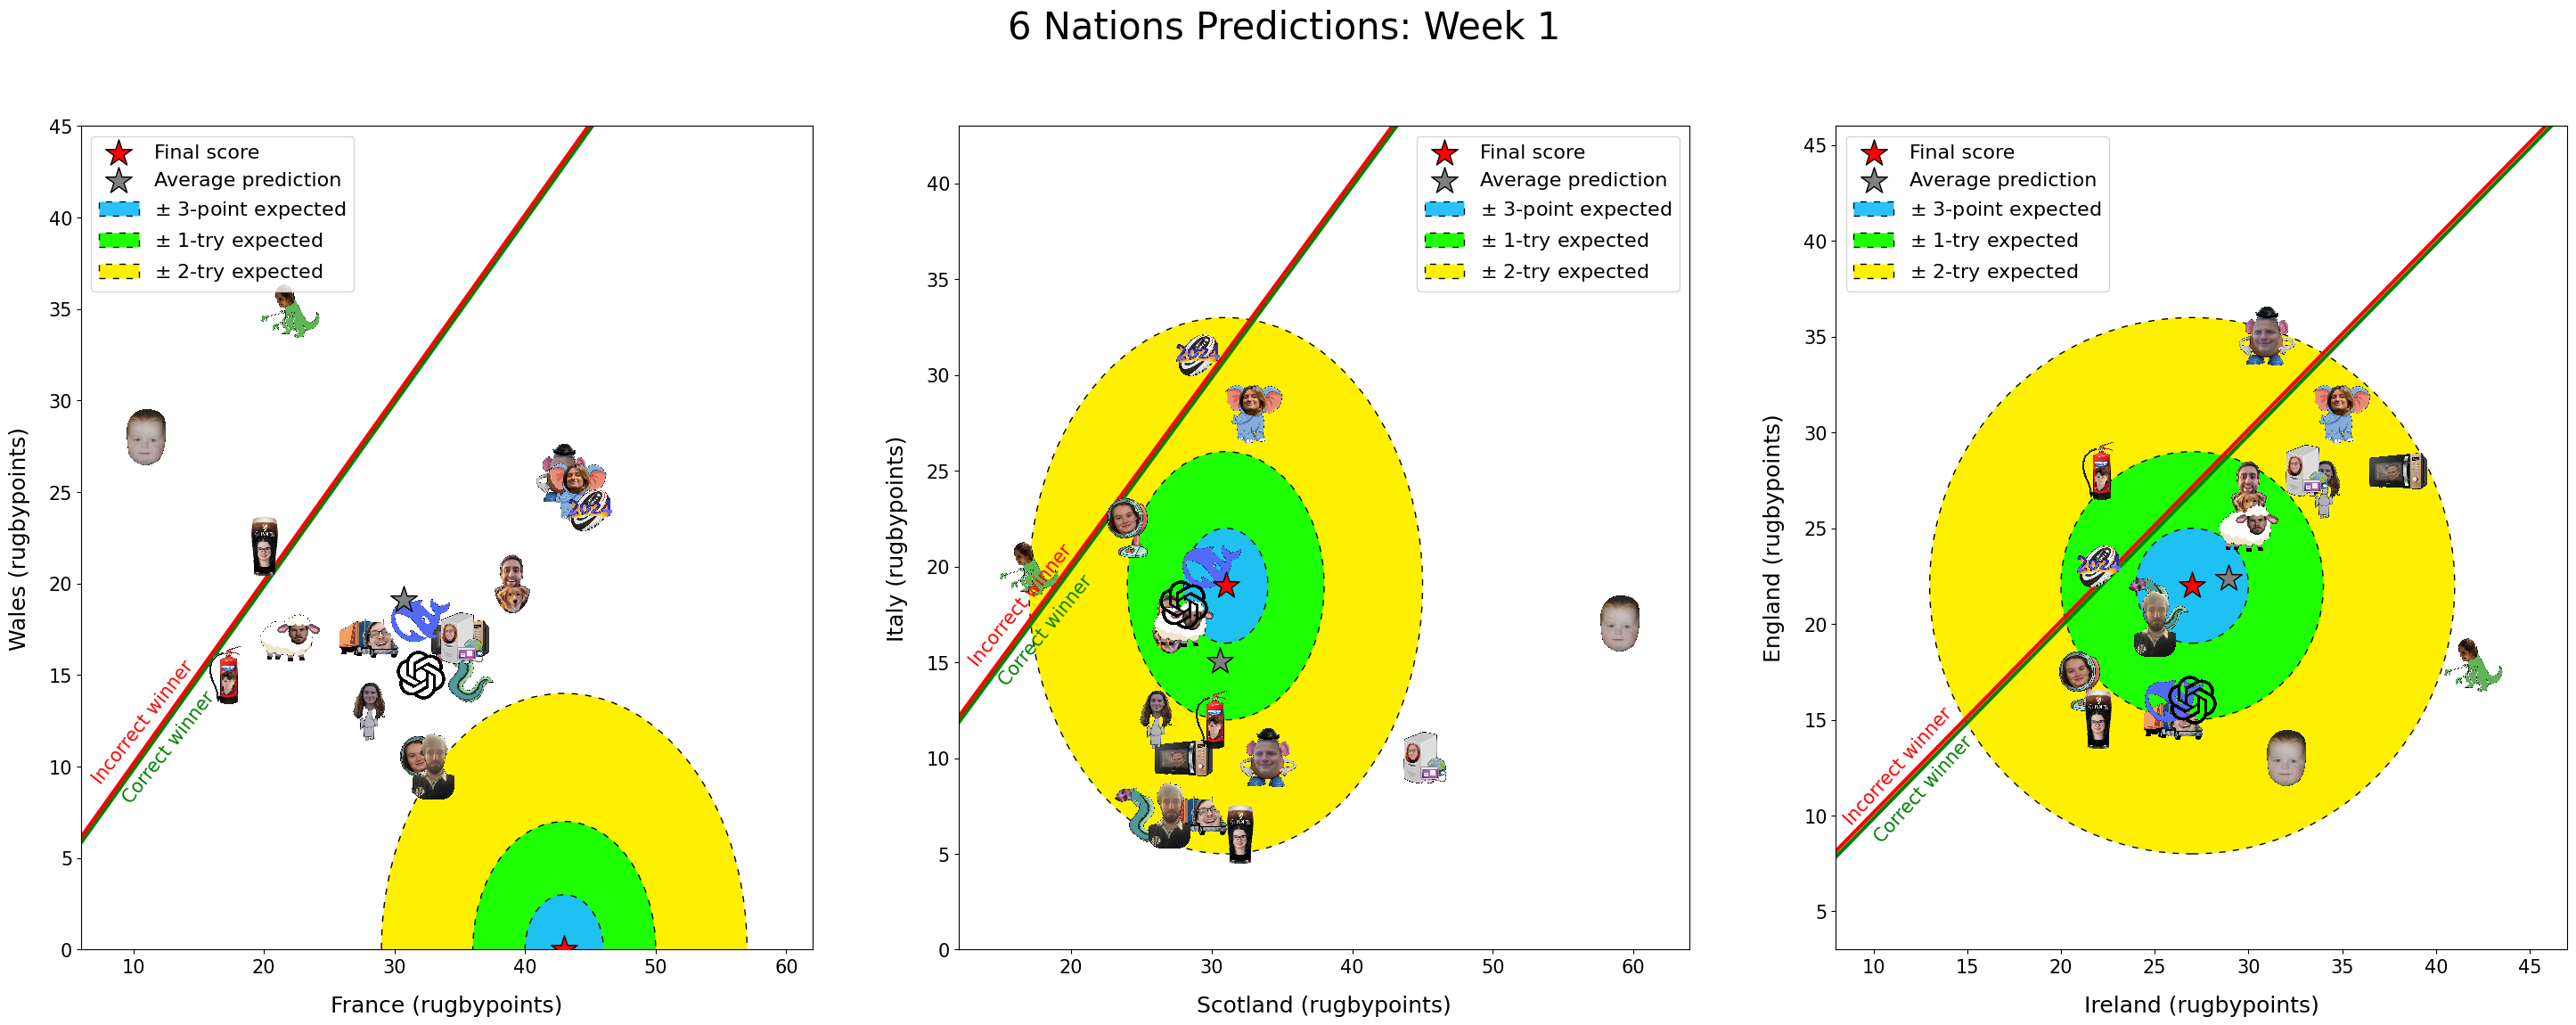

In [5]:
n_figs = 3
fig_x = 36
fig_y = 12

fig, axs = plt.subplots(1,n_figs,figsize=(fig_x, fig_y)) #Make seperate axes for each game
custom_crops = get_fig_crops(n_figs,fig_x,fig_y,x_label=True,y_label=True)

plot_matches(axs,games,predictions,markers,FinalScore=FinalScore,Nexpected=3,show_average=True,show_winloss=True)


plt.suptitle('6 Nations Predictions: Week {}'.format(week_number),size=30,y=0.99)
plt.show()
fig.savefig("Plots/2025/Week{}/SixN_Week{}_AllGames.png".format(week_number,week_number),dpi=200)

#Split multi-axis into individual games and save each separately
for i,ax in enumerate(axs):
    fig.savefig("Plots/2025/Week{}/SixN_Week{}_Game{}.png".format(week_number,week_number,str(i+1)), bbox_inches=custom_crops[i], dpi=200)

### Ranking plot

Combined try^2: 
{'Jay': 0.6269230769230769, 'Parisa': 0.568349358974359, 'Katie': 0.5106799450549451, 'Dylan': 0.442457264957265, 'Veera': 0.41843406593406596, 'Anna': 0.4102369505494506, 'Dave': 0.40950549450549456, 'Paul': 0.40476572039072045, 'Rory': 0.3831146978021978, 'Harriet': 0.3612740384615385, '2024': 0.34635912698412696, 'Eels': 0.3039285714285714, 'Giuseppe': 0.2926991758241758, 'Fan': 0.2842273351648352, 'Martin': 0.27505837912087916, 'JJ': 0.23666208791208793, 'Deepstate': 0.22483173076923074, 'Chatgpt': 0.21268887362637365, 'Average': 0.210984623015873}


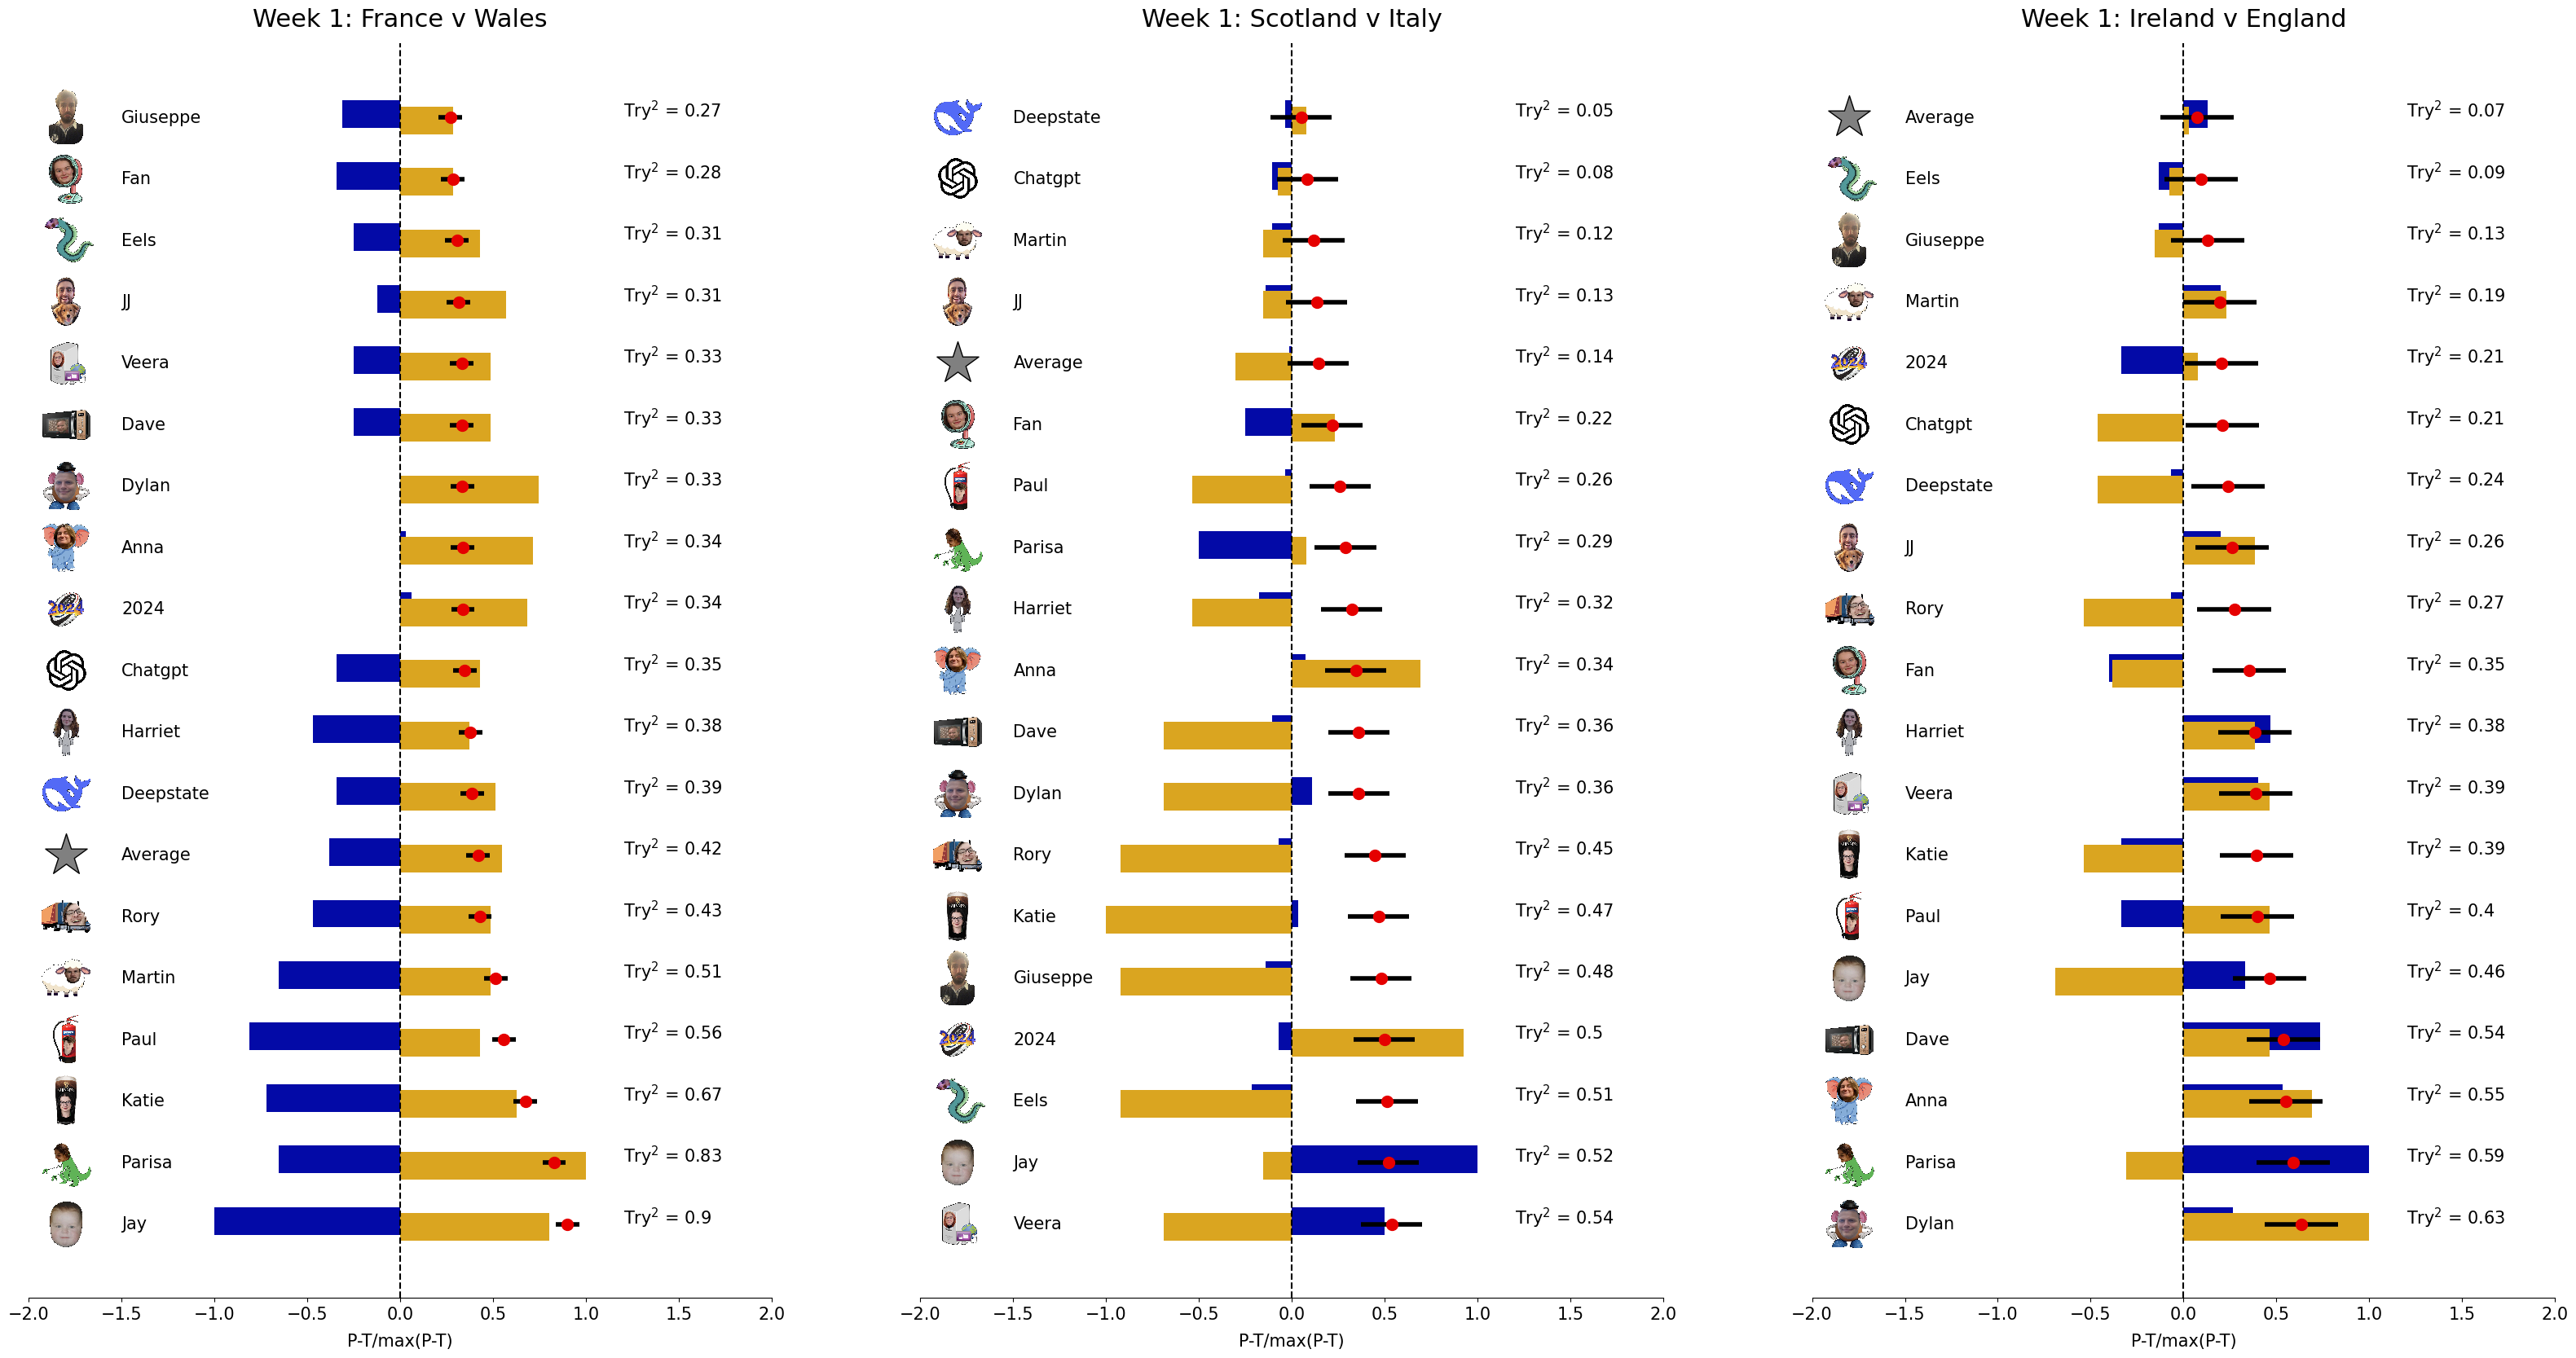

In [6]:
n_figs = 3
fig_x = 40
fig_y = 20

fig, axs = plt.subplots(1,n_figs,figsize=(fig_x,fig_y))
custom_crops = get_fig_crops(n_figs,fig_x,fig_y)

plot_ranking(axs,games,predictions,markers,FinalScore,win_SF=0.9,week=week_number,draw_markers=True,show_average=True,do_norm=True)
fig.savefig("Plots/2025/Week{}/SixN_Week{}_Rankings_AllGames.png".format(week_number,week_number),dpi=200)

for i,ax in enumerate(axs):
    fig.savefig("Plots/2025/Week{}/SixN_Week{}_Rankings_Game{}.png".format(week_number,week_number,str(i+1)), bbox_inches=custom_crops[i], dpi=200)


# Week 2

In [7]:
#Reload the prediction so we don't have to restart the kernel every time the data changes...
from PredictionData.Predictions2025 import predictions_wk2
week_number=2

calculate_average_prediction(predictions_wk2)
games = [("Italy","Wales"),("England","France"),("Scotland","Ireland")]
FinalScore = {
    ("Italy","Wales"):(22,15),
    ("England","France"):(26,25),
    ("Scotland","Ireland"):(18,32),
}
game_info["Week2"] = [games,predictions_wk2,FinalScore]

game_info["All"][0] += deepcopy(games)
for name, preds in deepcopy(predictions_wk2).items():
    if name in game_info["All"][1].keys():
        game_info["All"][1][name].update(preds)
    else:
        game_info["All"][1][name] = preds
game_info["All"][2].update(deepcopy(FinalScore))

In [8]:
predictions = predictions_wk2 #Pick the predictions
markers = player_markers #Pick the markers to use

### Score plot

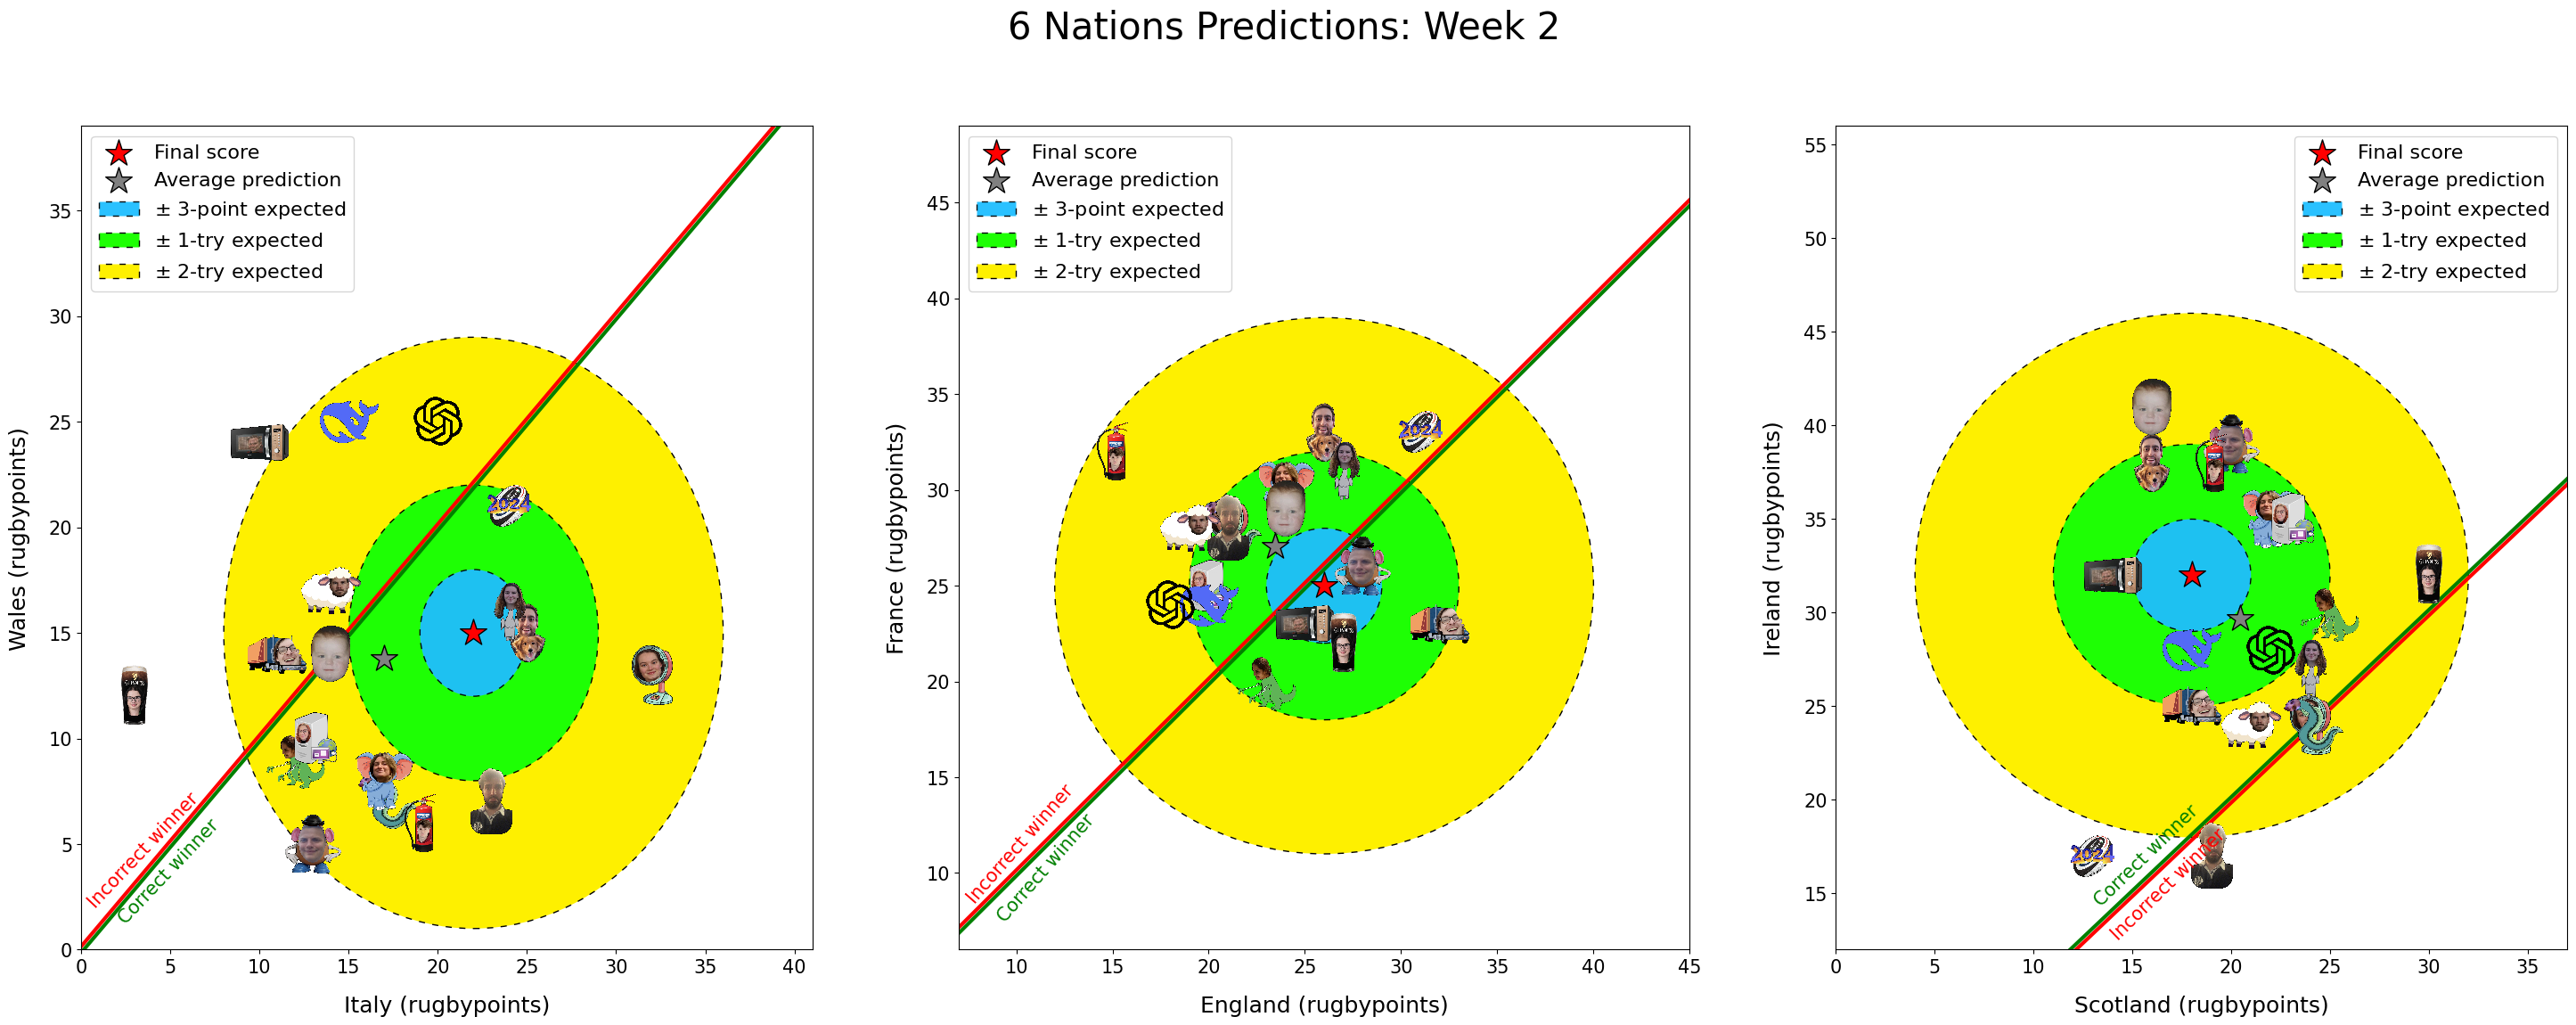

In [9]:
n_figs = 3
fig_x = 36
fig_y = 12

fig, axs = plt.subplots(1,n_figs,figsize=(fig_x, fig_y)) #Make seperate axes for each game
custom_crops = get_fig_crops(n_figs,fig_x,fig_y,x_label=True,y_label=True)
plot_matches(axs,games,predictions,markers,FinalScore=FinalScore,Nexpected=3,show_average=True,show_winloss=True)

plt.suptitle('6 Nations Predictions: Week '+str(week_number),size=30,y=0.99)
plt.show()
fig.savefig("Plots/2025/Week{}/SixN_Week{}_AllGames.png".format(week_number,week_number),dpi=200)

#Split multi-axis into individual games and save each separately
for i,ax in enumerate(axs):
    fig.savefig("Plots/2025/Week{}/SixN_Week{}_Game{}.png".format(week_number,week_number,str(i+1)), bbox_inches=custom_crops[i], dpi=200)


### Ranking plot

In [10]:
n_figs = 3
fig_x = 40
fig_y = 20

fig, axs = plt.subplots(1,n_figs,figsize=(fig_x,fig_y))
custom_crops = get_fig_crops(n_figs,fig_x,fig_y)
plot_ranking(axs,games,predictions,markers,FinalScore,win_SF=0.9,week=week_number,draw_markers=True,show_average=True,do_norm=True)
fig.savefig("Plots/2025/Week{}/SixN_Week{}_Rankings_AllGames.png".format(week_number,week_number),dpi=200)

for i,ax in enumerate(axs):
    fig.savefig("Plots/2025/Week{}/SixN_Week{}_Rankings_Game{}.png".format(week_number,week_number,str(i+1)), bbox_inches=custom_crops[i], dpi=200)

Combined try^2: 
{'2024': 0.560713716108453, 'Paul': 0.5436842105263158, 'Eels': 0.4699534821903243, 'Giuseppe': 0.44670786815523655, 'Katie': 0.4365530303030303, 'Fan': 0.41942716640085065, 'Chatgpt': 0.41625598086124405, 'Parisa': 0.4111064593301435, 'Martin': 0.3895693779904306, 'Deepstate': 0.3798125996810207, 'Dylan': 0.36207535885167463, 'Anna': 0.35894338118022334, 'Dave': 0.3563995215311005, 'Veera': 0.3294617224880383, 'Jay': 0.3154784688995215, 'Rory': 0.30247607655502395, 'Harriet': 0.2959409888357257, 'JJ': 0.27535087719298246, 'Average': 0.19324051922736132}


# Week 3

In [11]:
#Reload the prediction so we don't have to restart the kernel every time the data changes...
from PredictionData.Predictions2025 import predictions_wk3
week_number=3

calculate_average_prediction(predictions_wk3)

games = [("Wales","Ireland"),("England","Scotland"),("Italy","France")]
FinalScore = {
    ("Wales","Ireland"):(18,27),
    ("England","Scotland"):(16,15),
    ("Italy","France"):(24,73),
}
game_info["Week3"] = [games,predictions_wk3,FinalScore]

game_info["All"][0] += deepcopy(games)
for name, preds in deepcopy(predictions_wk3).items():
    if name in game_info["All"][1].keys():
        game_info["All"][1][name].update(preds)
    else:
        game_info["All"][1][name] = preds
game_info["All"][2].update(deepcopy(FinalScore))

In [12]:
predictions = predictions_wk3 #Pick the predictions
markers = player_markers #Pick the markers to use

### Score plot

In [13]:
n_figs = 3
fig_x = 36
fig_y = 12

fig, axs = plt.subplots(1,n_figs,figsize=(fig_x, fig_y)) #Make seperate axes for each game
custom_crops = get_fig_crops(n_figs,fig_x,fig_y,x_label=True,y_label=True)
plot_matches(axs,games,predictions,markers,FinalScore=FinalScore,Nexpected=3,show_average=True,show_winloss=True)

plt.suptitle('6 Nations Predictions: Week '+str(week_number),size=30,y=0.99)
plt.show()
fig.savefig("Plots/2025/Week{}/SixN_Week{}_AllGames.png".format(week_number,week_number),dpi=200)

#Split multi-axis into individual games and save each separately
for i,ax in enumerate(axs):
    fig.savefig("Plots/2025/Week{}/SixN_Week{}_Game{}.png".format(week_number,week_number,str(i+1)), bbox_inches=custom_crops[i], dpi=200)

### Ranking plot

Combined try^2: 
{'Rory': 0.716547619047619, 'Dylan': 0.6598901098901099, 'Martin': 0.5968396418396419, 'Eels': 0.5907142857142857, 'Anna': 0.5883424908424908, '2024': 0.5816748066748066, 'Jay': 0.5644688644688646, 'Harriet': 0.5366524216524217, 'Giuseppe': 0.5286080586080586, 'Paul': 0.5234747659747659, 'Katie': 0.5207549857549857, 'JJ': 0.5044098494098493, 'Veera': 0.5010897435897436, 'Average': 0.49055809930809924, 'Dave': 0.4809798534798535, 'Fan': 0.46996947496947494, 'Chatgpt': 0.3439652014652015, 'Deepstate': 0.34061457061457057, 'Parisa': 0.28086182336182336}


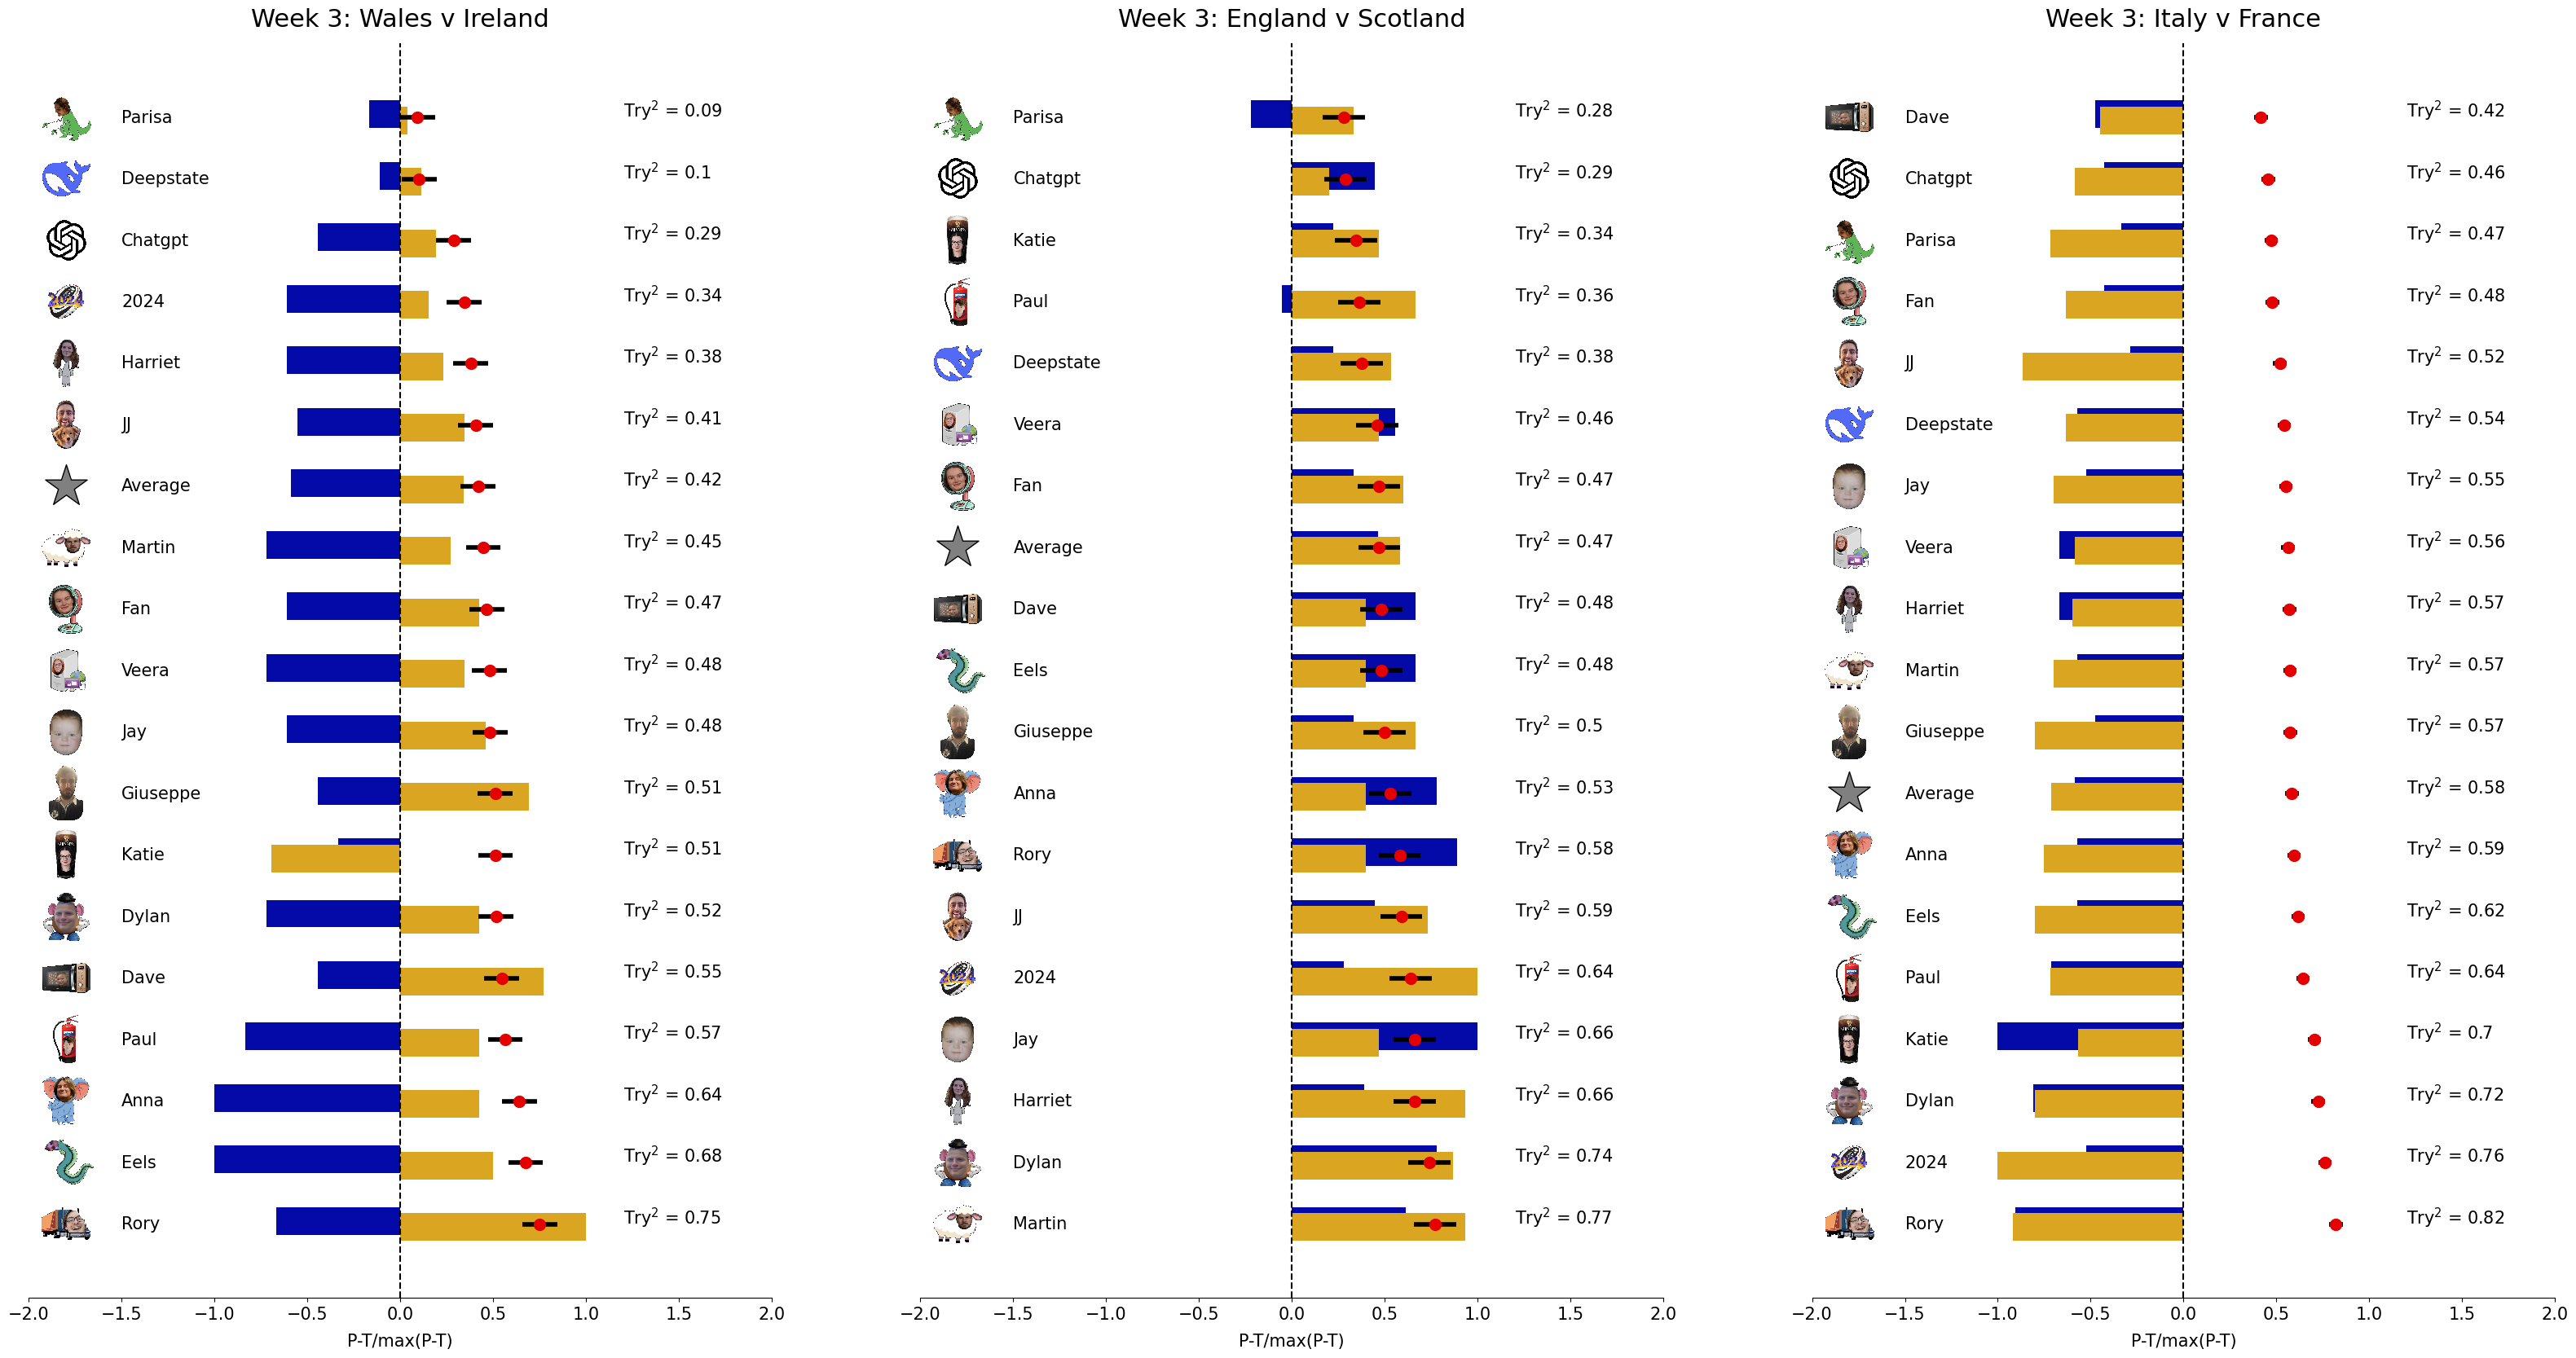

In [14]:
n_figs = 3
fig_x = 40
fig_y = 20

fig, axs = plt.subplots(1,n_figs,figsize=(fig_x,fig_y))
custom_crops = get_fig_crops(n_figs,fig_x,fig_y)
plot_ranking(axs,games,predictions,markers,FinalScore,win_SF=0.9,week=week_number,draw_markers=True,show_average=True,do_norm=True)
fig.savefig("Plots/2025/Week{}/SixN_Week{}_Rankings_AllGames.png".format(week_number,week_number),dpi=200)

for i,ax in enumerate(axs):
    fig.savefig("Plots/2025/Week{}/SixN_Week{}_Rankings_Game{}.png".format(week_number,week_number,str(i+1)), bbox_inches=custom_crops[i], dpi=200)

# Week 4

In [15]:
#Reload the prediction so we don't have to restart the kernel every time the data changes...
from PredictionData.Predictions2025 import predictions_wk4
week_number=4

calculate_average_prediction(predictions_wk4)

games = [("Ireland","France"),("Scotland","Wales"),("England","Italy")]
FinalScore = {
    ("Ireland","France"):(27,42),
    ("Scotland","Wales"):(35,29),
    ("England","Italy"):(47,24),
}
game_info["Week4"] = [games,predictions_wk4,FinalScore]

game_info["All"][0] += deepcopy(games)
for name, preds in deepcopy(predictions_wk4).items():
    if name in game_info["All"][1].keys():
        game_info["All"][1][name].update(preds)
    else:
        game_info["All"][1][name] = preds
game_info["All"][2].update(deepcopy(FinalScore))

In [16]:
predictions = predictions_wk4 #Pick the predictions
markers = player_markers #Pick the markers to use

### Score plot

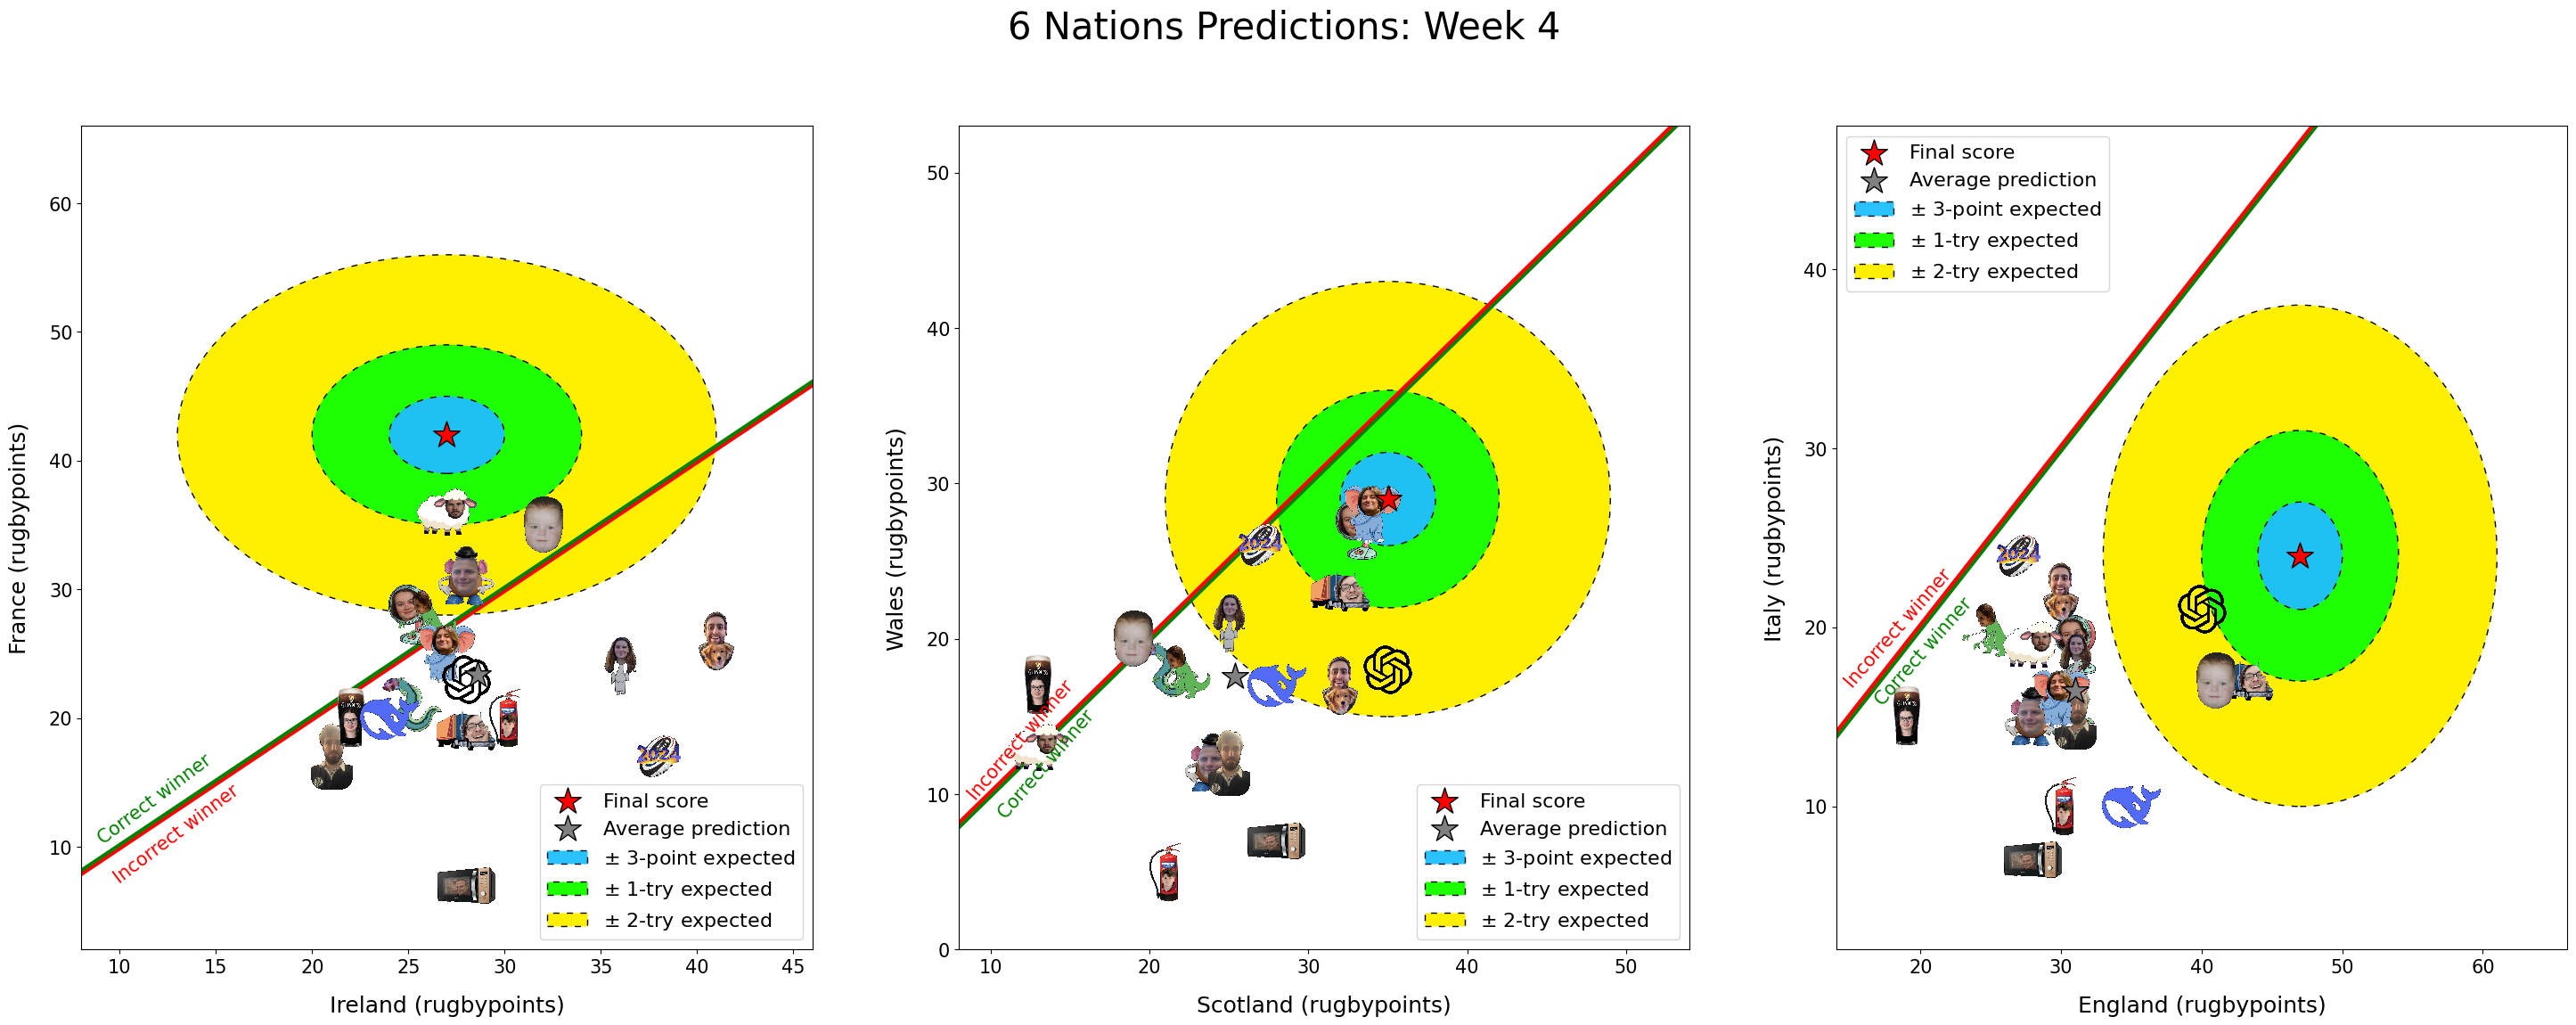

In [17]:
n_figs = 3
fig_x = 36
fig_y = 12

fig, axs = plt.subplots(1,n_figs,figsize=(fig_x, fig_y)) #Make seperate axes for each game
custom_crops = get_fig_crops(n_figs,fig_x,fig_y,x_label=True,y_label=True)
plot_matches(axs,games,predictions,markers,FinalScore=FinalScore,Nexpected=3,show_average=True,show_winloss=True)

plt.suptitle('6 Nations Predictions: Week '+str(week_number),size=30,y=0.99)
plt.show()
fig.savefig("Plots/2025/Week{}/SixN_Week{}_AllGames.png".format(week_number,week_number),dpi=200)

#Split multi-axis into individual games and save each separately
for i,ax in enumerate(axs):
    fig.savefig("Plots/2025/Week{}/SixN_Week{}_Game{}.png".format(week_number,week_number,str(i+1)), bbox_inches=custom_crops[i], dpi=200)

### Ranking plot

Combined try^2: 
{'Katie': 0.6436974789915966, 'Dave': 0.6155844155844156, 'Paul': 0.6005315762668704, 'Giuseppe': 0.5300340590781767, 'Eels': 0.4584972625413801, 'Deepstate': 0.4510185892538834, 'Harriet': 0.44969442322383496, 'Martin': 0.44939542483660133, 'JJ': 0.4470301757066463, '2024': 0.4304383116883117, 'Dylan': 0.4203046218487395, 'Average': 0.3965512140685151, 'Parisa': 0.381251909854851, 'Jay': 0.3611911128087599, 'Rory': 0.2625763941940412, 'Anna': 0.255680226636109, 'Fan': 0.23739686783804434, 'Chatgpt': 0.2351015406162465}


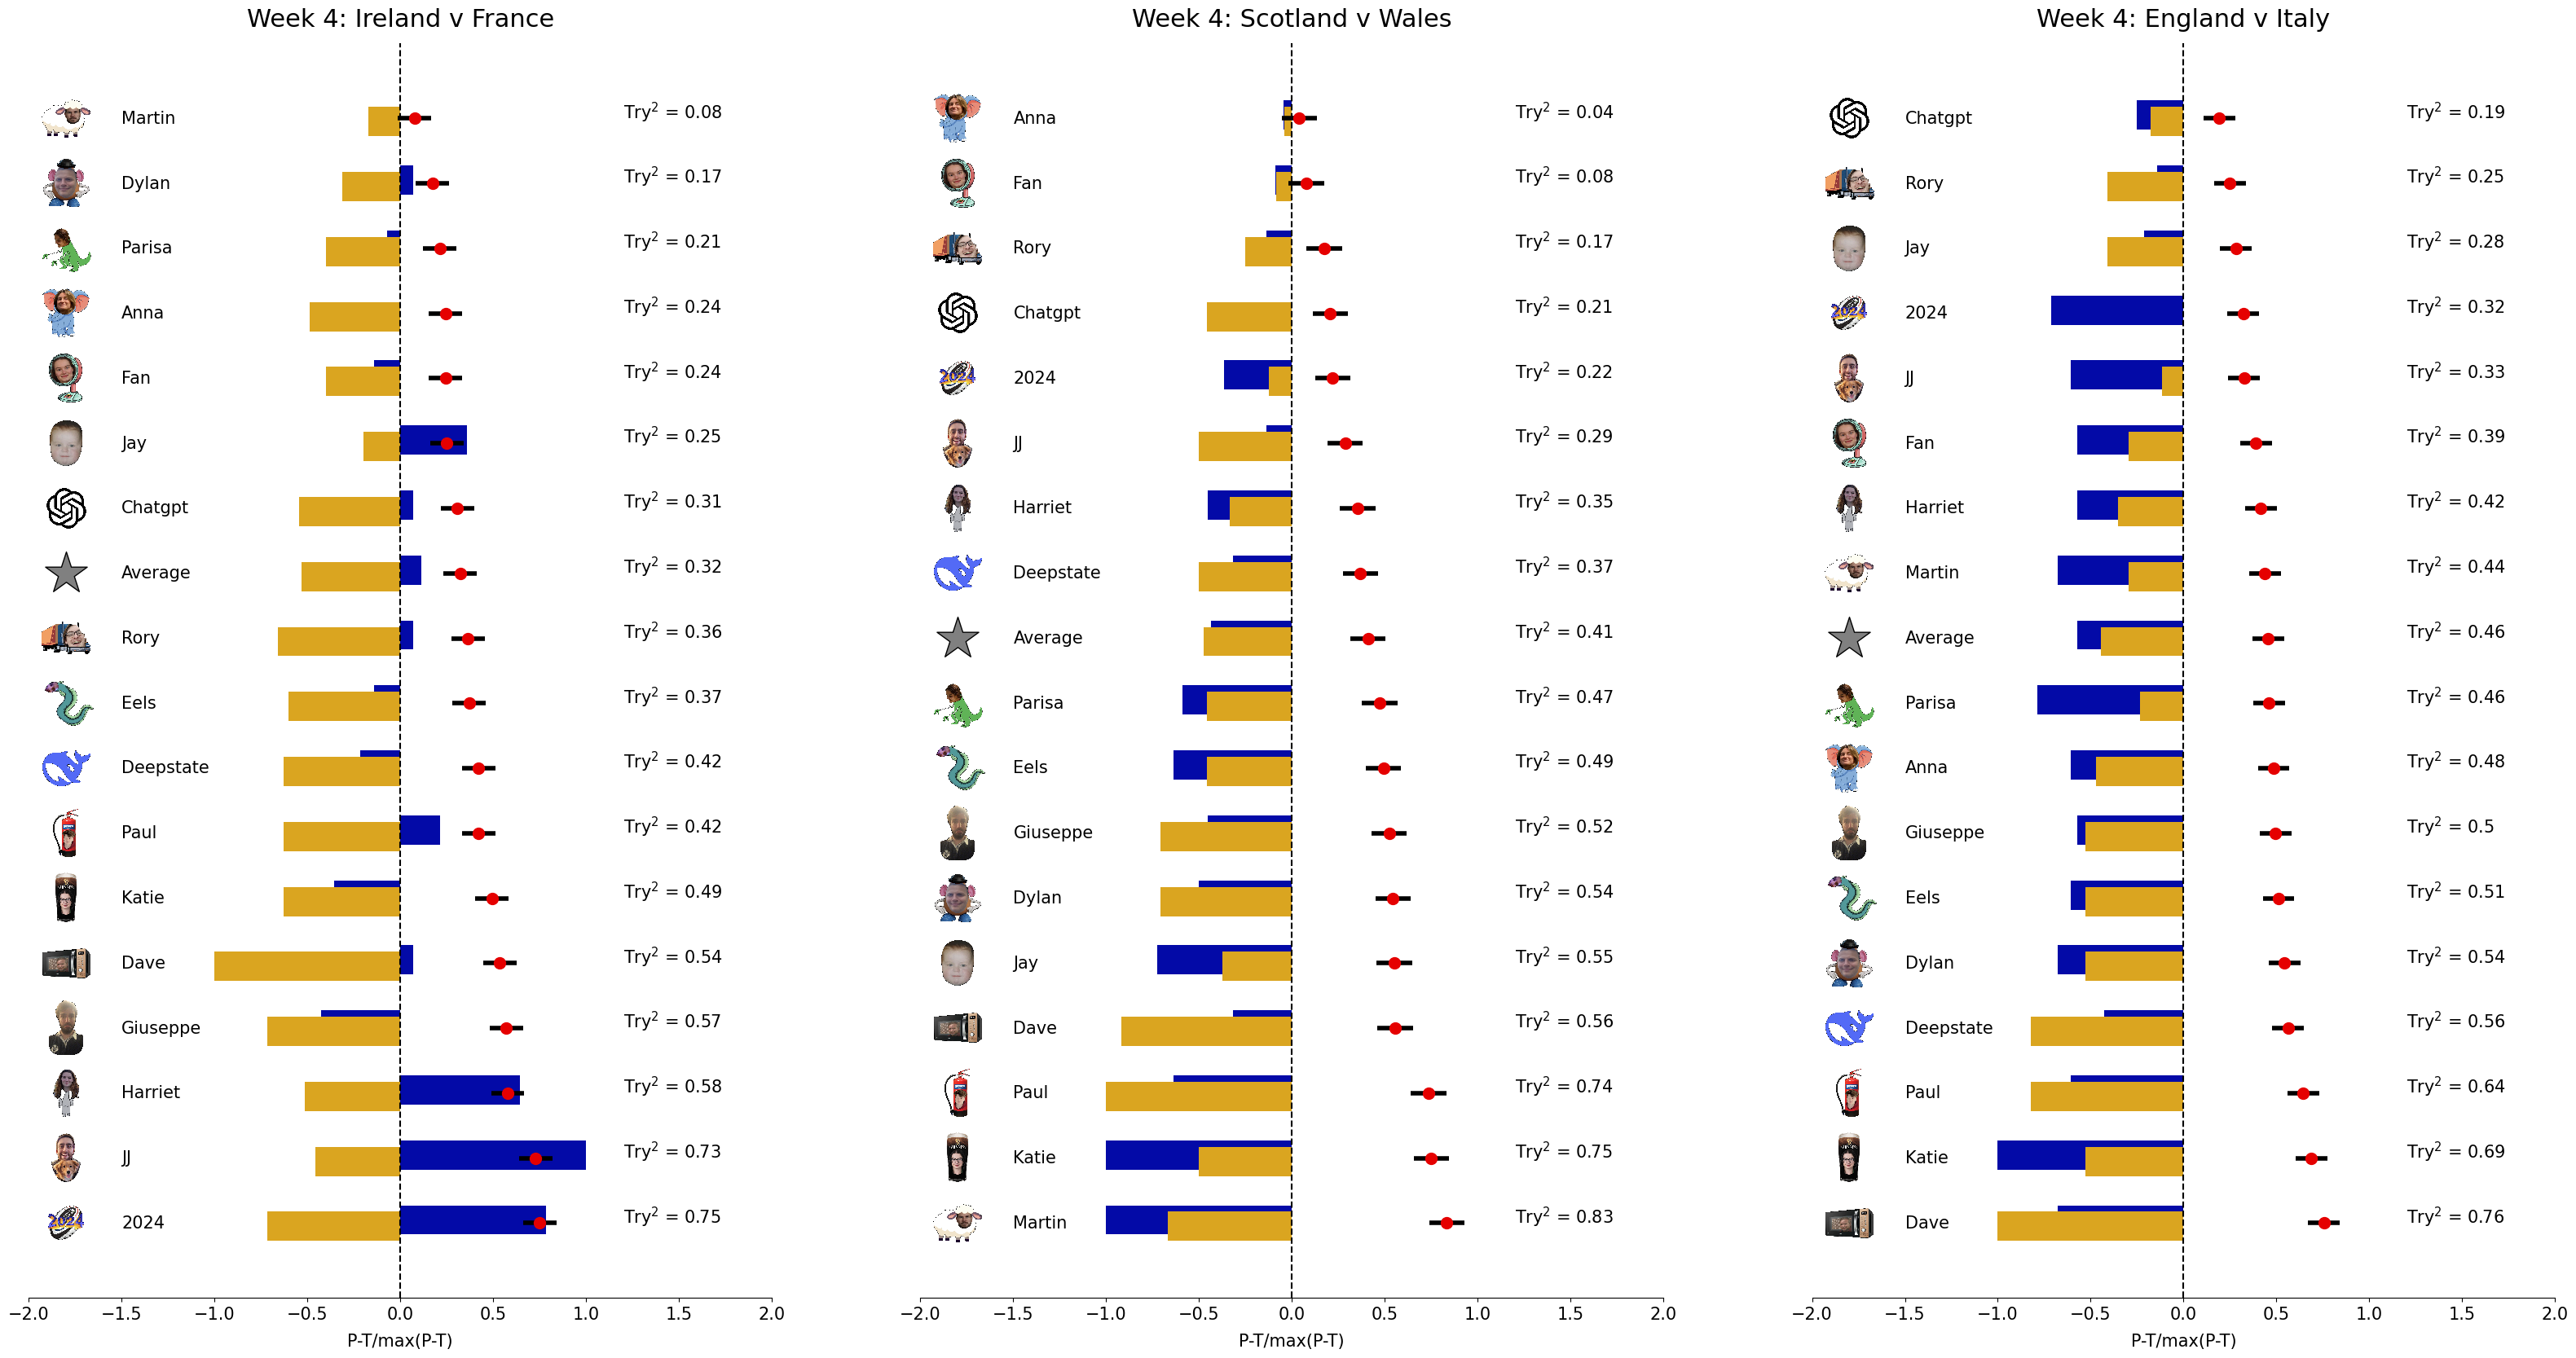

In [18]:
n_figs = 3
fig_x = 40
fig_y = 20

fig, axs = plt.subplots(1,n_figs,figsize=(fig_x,fig_y))
custom_crops = get_fig_crops(n_figs,fig_x,fig_y)
plot_ranking(axs,games,predictions,markers,FinalScore,win_SF=0.9,week=week_number,draw_markers=True,show_average=True,do_norm=True)
fig.savefig("Plots/2025/Week{}/SixN_Week{}_Rankings_AllGames.png".format(week_number,week_number),dpi=200)

for i,ax in enumerate(axs):
    fig.savefig("Plots/2025/Week{}/SixN_Week{}_Rankings_Game{}.png".format(week_number,week_number,str(i+1)), bbox_inches=custom_crops[i], dpi=200)

# Tournament Ranking

In [19]:
do_norm = False
weekly_rankings = calc_trysq_weekly(game_info,win_SF=0.9,do_norm=do_norm,do_var_err=True)
for week,info in weekly_rankings.items():
    print(week)
    print(weekly_rankings[week]["try_sq"])

Week1
{'Jay': 16.599999999999998, 'Parisa': 14.683333333333332, 'Katie': 11.4, 'Paul': 9.183333333333334, 'Veera': 9.0, 'Dylan': 8.533333333333333, 'Anna': 8.100000000000001, 'Rory': 8.1, 'Dave': 8.1, 'Harriet': 7.8, 'Martin': 7.3500000000000005, '2024': 7.233333333333334, 'Eels': 6.6000000000000005, 'Fan': 6.300000000000001, 'Giuseppe': 6.0, 'Average': 5.708333333333333, 'JJ': 5.7, 'Deepstate': 5.7, 'Chatgpt': 5.400000000000001}
Week2
{'2024': 6.366666666666667, 'Katie': 6.066666666666667, 'Paul': 5.8500000000000005, 'Eels': 5.616666666666667, 'Fan': 5.466666666666666, 'Giuseppe': 5.3500000000000005, 'Martin': 4.983333333333333, 'Parisa': 4.95, 'Chatgpt': 4.7, 'Dylan': 4.6499999999999995, 'Deepstate': 4.6000000000000005, 'Dave': 4.55, 'Veera': 4.3, 'Rory': 4.25, 'Jay': 4.1499999999999995, 'Anna': 4.016666666666667, 'Harriet': 3.266666666666667, 'JJ': 2.983333333333333, 'Average': 2.418518518518519}
Week3
{'Rory': 20.1, '2024': 17.416666666666668, 'Dylan': 17.400000000000002, 'Eels': 1

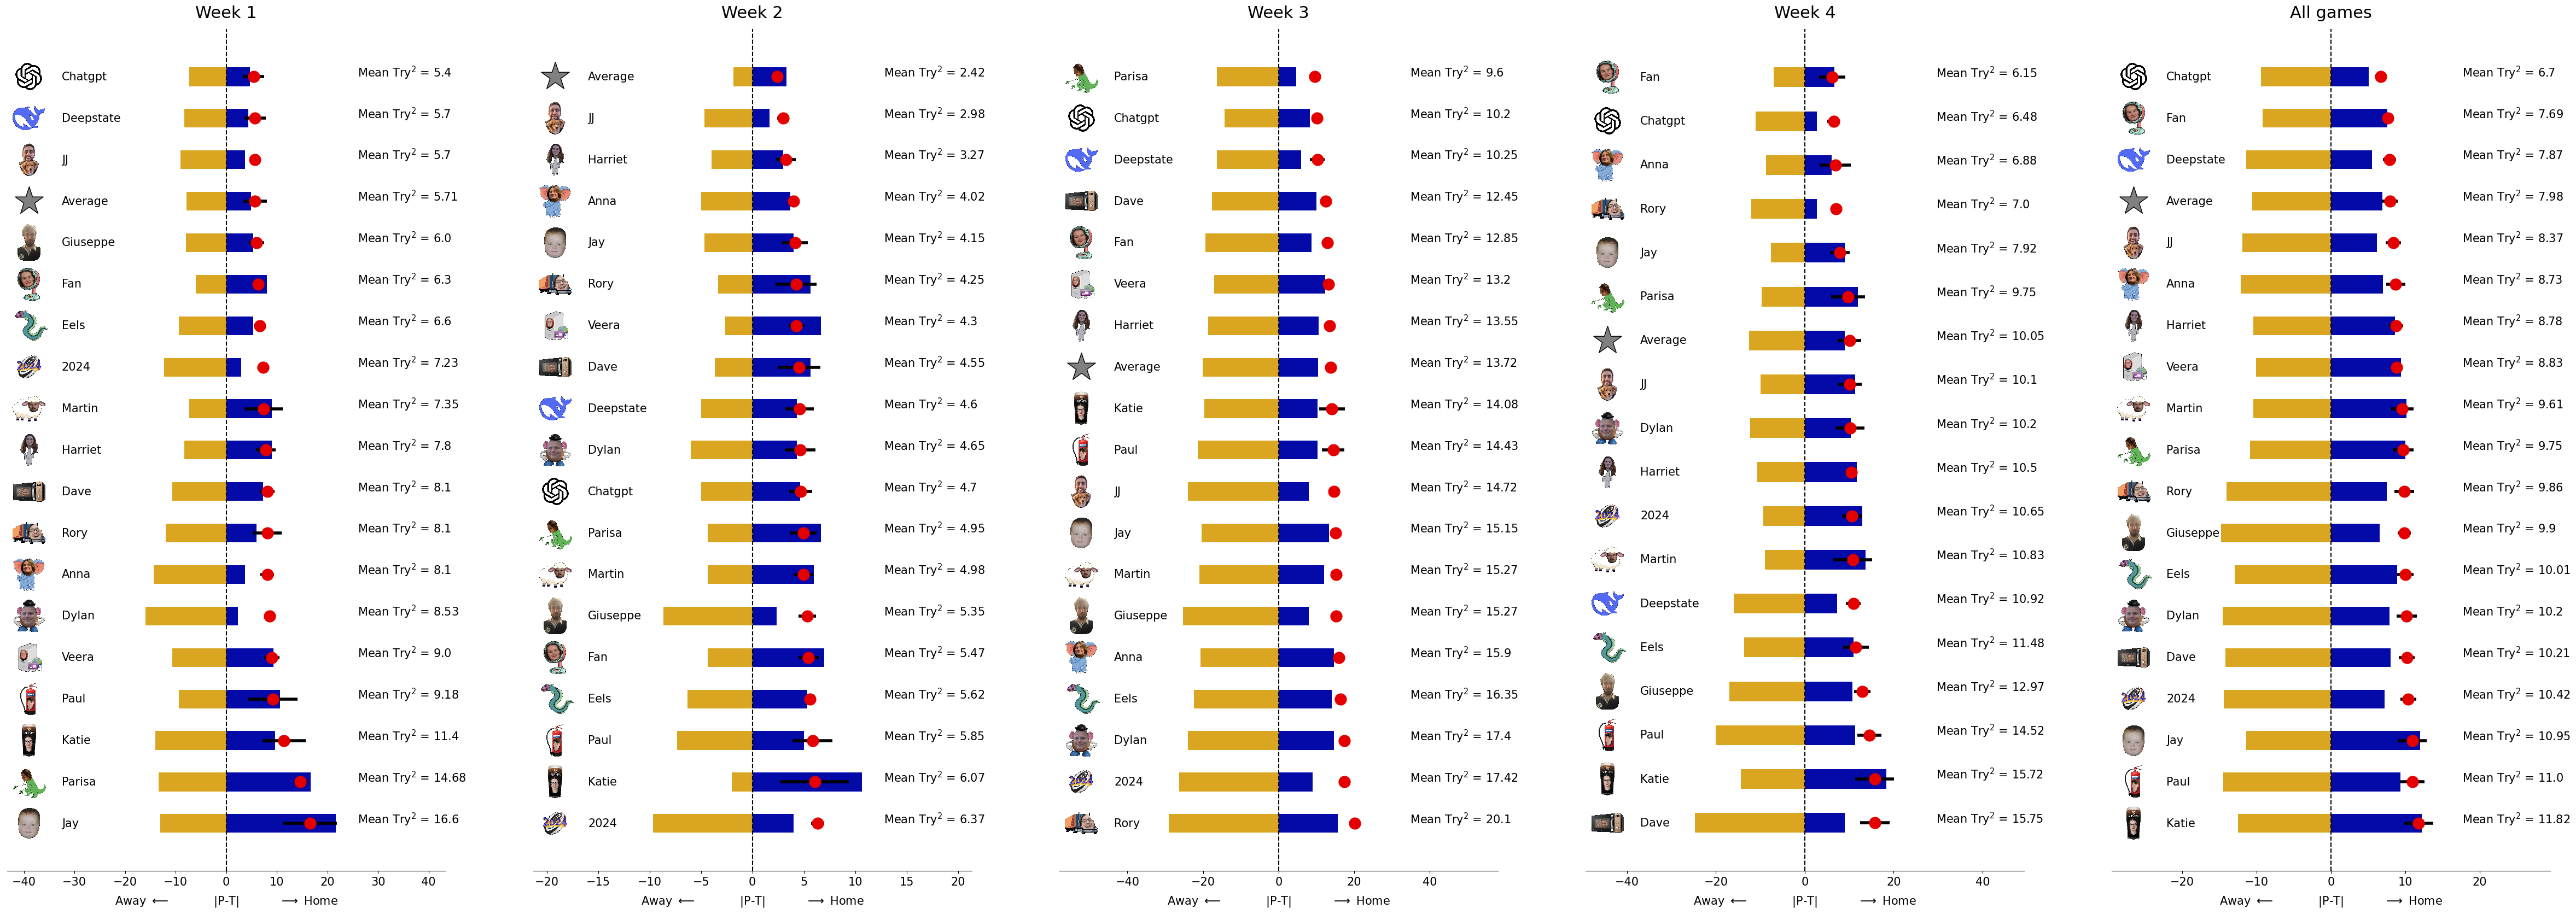

In [20]:
n_weeks = 4
n_figs = n_weeks+1
fig_x = n_figs*12
fig_y = 20

fig, axs = plt.subplots(1,n_figs,figsize=(fig_x,fig_y))
custom_crops = get_fig_crops(n_figs,fig_x,fig_y,x_label=True,y_label=False)

plot_tournament_ranking(axs,weekly_rankings,markers,draw_markers=True,show_average=True,do_norm=do_norm)
fig.savefig("Plots/2025/TournamentRanking/SixN_Tournament_Rankings.png")

for i,ax in enumerate(axs):
    if i<n_weeks: 
        fig.savefig("Plots/2025/TournamentRanking/SixN_Tournament_Rankings_Week"+str(i+1)+".png", bbox_inches=custom_crops[i])
    else:
        fig.savefig("Plots/2025/TournamentRanking/SixN_Tournament_Rankings_AllGames.png", bbox_inches=custom_crops[i])

# Significance

In [40]:
# Make N random guesses for each game for each week
# Order toys and predictions and join together
# Calculate the Try^2 for all predictions and all toys
# Pull out only the toys and take the mean
rng = np.random.default_rng()
n_toys = 10000
guesses = {}
toys = {}
try_sq = {}
errors = {}
mean_avg_toy = {}
one_sigma = {}
two_sigma = {}
three_sigma = {}
do_norm = True
game_info = dict(sorted(game_info.items(), key=lambda wk:wk[0][-1]))

for week,info in game_info.items():
    guesses[week] = {}
    toys[week] = {}
    games = info[0]
    predictions = info[1]
    FinalScore = info[2]
    for game in games:
        guesses1 = rng.integers(low=0, high=50, size=n_toys)
        guesses2 = rng.integers(low=0, high=50, size=n_toys)
        guesses[week][game] = list(zip(guesses1,guesses2))

    for x in range(n_toys):
        toys[week][x] = {}
        for game in games:
            toys[week][x][game] = guesses[week][game][x]


    ordered_predictions = OrderedDict(predictions)
    ordered_toys = OrderedDict(toys[week])
    ordered_predictions.update(toys[week])
    
    avg_try_sq = calc_trysq_avg(ordered_predictions,FinalScore,win_SF=0.9,do_norm=do_norm,do_var_err=True)
    try_sq[week] = avg_try_sq["try_sq"]
    errors[week] = avg_try_sq["error"]

    combined_toys = []
    for x in range(n_toys):
        combined_toys.append(try_sq[week][x])
    mean_avg_toy[week] = np.mean(combined_toys)
    print("Mean Try^2 for {}: {}".format(week,mean_avg_toy[week]))

    found1s = False
    found2s = False
    found3s = False
    extent = max((mean_avg_toy[week] - np.min(combined_toys)),(np.max(combined_toys) - mean_avg_toy[week]))
    for x in np.linspace(extent, 0, num=1000):
        p_outside_below = np.argwhere(combined_toys < (mean_avg_toy[week]-x)).shape[0]
        p_outside_above= np.argwhere(combined_toys > (mean_avg_toy[week]+x)).shape[0]
        inverted_sigma = (p_outside_below + p_outside_above)/len(combined_toys)
        if found3s == False and inverted_sigma > 1-0.997:
            print("{}: 3-sigma value = {}".format(week,(mean_avg_toy[week]-x)))
            three_sigma[week] = (mean_avg_toy[week]-x)
            found3s = True
        if found2s == False and inverted_sigma > 1-0.95:
            print("{}: 2-sigma value = {}".format(week,(mean_avg_toy[week]-x)))
            two_sigma[week] = (mean_avg_toy[week]-x)
            found2s = True
        if found1s == False and inverted_sigma > 1-0.68:
            print("{}: 1-sigma value = {}".format(week,(mean_avg_toy[week]-x)))
            one_sigma[week] = (mean_avg_toy[week]-x)
            found1s = True
            break

Mean Try^2 for Week1: 0.5206776404494381
Week1: 3-sigma value = 0.13731571324133102
Week1: 2-sigma value = 0.24479139746488043
Week1: 1-sigma value = 0.3714591681569208
Mean Try^2 for Week2: 0.5181228082191781
Week2: 3-sigma value = 0.12499977388347255
Week2: 2-sigma value = 0.24944853812716827
Week2: 1-sigma value = 0.37679145967885697
Mean Try^2 for Week3: 0.5581043147208122
Week3: 3-sigma value = 0.21794637480119722
Week3: 2-sigma value = 0.32366516237049237
Week3: 1-sigma value = 0.4338073301728125
Mean Try^2 for Week4: 0.5018220555555556
Week4: 3-sigma value = 0.11484899760871992
Week4: 2-sigma value = 0.22854726721165614
Week4: 1-sigma value = 0.3567071588254922
Mean Try^2 for All: 0.6602205739910313
All: 3-sigma value = 0.4122734252817839
All: 2-sigma value = 0.49390211621486946
All: 1-sigma value = 0.574850568056846


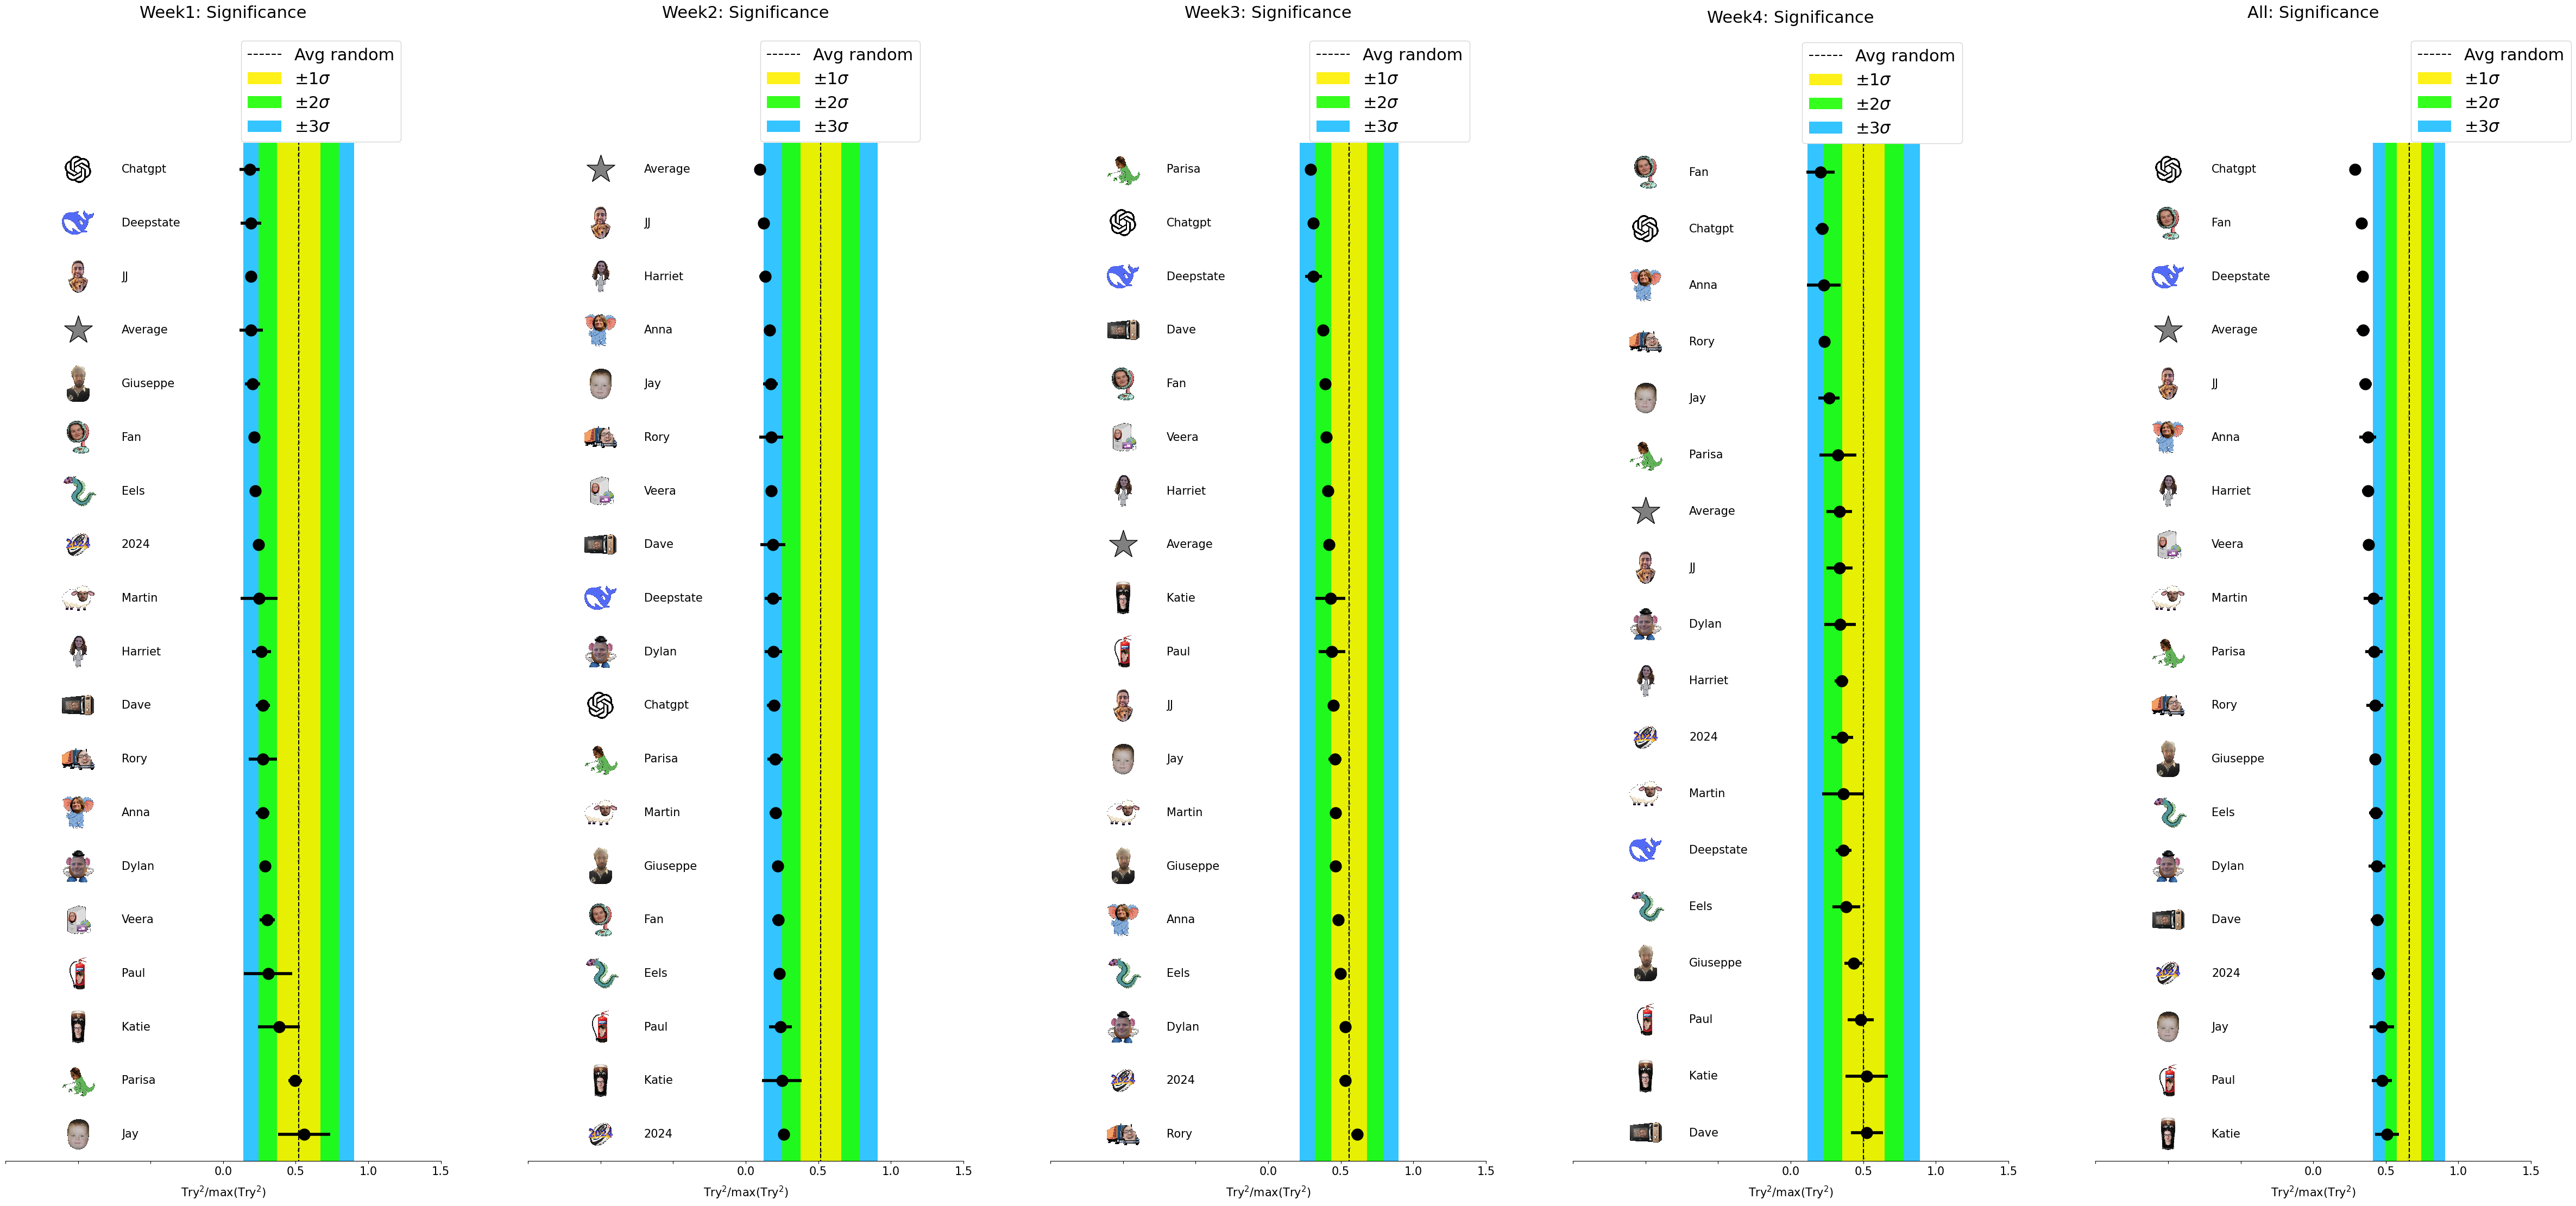

In [41]:
sigmas = [one_sigma,two_sigma,three_sigma]
markers = player_markers #Pick the markers to use

n_weeks = 4
n_figs = n_weeks+1
fig_x = n_figs*12
fig_y = 25
fig, axs = plt.subplots(1,n_figs,figsize=(fig_x,fig_y))
custom_crops = get_fig_crops(n_figs,fig_x,fig_y+1.5,x_label=True,y_label=False)
plot_significance(axs,n_toys,game_info,try_sq,errors,mean_avg_toy,sigmas,markers,draw_markers=True,show_average=True,do_norm=do_norm,bottom_pad=0.5,top_pad=0.5,title_pad=6.5)
fig.savefig("Plots/2025/StatSignificance/SixN_StatSignificance_AllWeeks.png",dpi=300)
for i,ax in enumerate(axs):
    if i < n_weeks:
        fig.savefig("Plots/2025/StatSignificance/SixN_StatSignificance_Week"+str(i+1)+".png", bbox_inches=custom_crops[i],dpi=200)
    else:
        fig.savefig("Plots/2025/StatSignificance/SixN_StatSignificance_All.png", bbox_inches=custom_crops[i],dpi=200)